# WeatherPy
----

## Trends
* As we can see from the scatter plot visualizing the latitude against the max temperature, cities around the equator are clustered around the temperature range of 75F to 88F. The further we move away from the equator to either pole, the temperature starts decreasing. The decline in temperature is at faster pace moving towards to the north pole than when moving towards the south pole.

* However, from the rest of the scatter plots, we can see that there is no relationship between latitude on one side and humidity, cloudiness, and wind speed on the other side.

* More cities are suffering from humidity among out group of cities, mostly above 60%. Many cities even are clustered around the hundreds.

* Unlike the wind speed for most cities, it is the exact opposite. most cities are clustered around the range of 0-10 mph for sind speed.

* Cloudiness is all over the place for our group place. There are no one cluster of cities around a certain range, except that one line of cities around the 0% clouds.

* We can draw a bigger picture about the pool of cities we pulled our data for: the temperature is what is making all the difference for the cities around the equator. Beside the temperature, cities are mostly equal in the rest of the displayed weather conditions.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

pp = pprint.PrettyPrinter(indent=2)

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
# Initializing a dataframe to feed it with the columns and rows from the for loop
citiesWeather_df = pd.DataFrame()
citiesWeather_df['City'] = ""
citiesWeather_df['Cloudiness'] = ""
citiesWeather_df['Country'] = ""
citiesWeather_df['Date'] = ""
citiesWeather_df['Humidity'] = ""
citiesWeather_df['Lat'] = ""
citiesWeather_df['Lng'] = ""
citiesWeather_df['Max Temp'] = ""
citiesWeather_df['Wind Speed'] = ""

# initializing an index to use later to populate the dataframe
index = 0

# iterating over the list of cities we got through citipy
for city in cities:
    
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={city.city_name},{city.country_code}&units=imperial&appid={api_keys.api_key}"
    
    # keeping response and response json separate so I can still access the status code
    response = requests.get(base_url)
    response_json = response.json()
    status = int(response.status_code)
    
    # making sure the status is working
    if status >= 200 and status < 210:
        # enclosing the DF populating process in try-except 
        # so that it does not stop if didn't find a city
        try:
            print(f"Processing Record {index} | {city.city_name}")
             
            citiesWeather_df.loc[index, 'City'] = response_json["name"]
            citiesWeather_df.loc[index, 'Cloudiness'] = response_json["clouds"]["all"]
            citiesWeather_df.loc[index, 'Country'] = response_json["sys"]["country"]
            citiesWeather_df.loc[index, 'Date'] = response_json["dt"]
            citiesWeather_df.loc[index, 'Humidity'] = response_json["main"]["humidity"]
            citiesWeather_df.loc[index, 'Lat'] = response_json["coord"]["lat"]
            citiesWeather_df.loc[index, 'Lng'] = response_json["coord"]["lon"]
            citiesWeather_df.loc[index, 'Max Temp'] = response_json["main"]["temp_max"]
            citiesWeather_df.loc[index, 'Wind Speed'] = response_json["wind"]["speed"]
            index = index + 1
        except (KeyError, IndexError):
            print("City not found. Skipping...") 
    else:
        print("City not found. Skipping...")
        
    if index == 600:
        break
       
    time.sleep(1)
    
print(citiesWeather_df)

Processing Record 0 | vaini
Processing Record 1 | upernavik
City not found. Skipping...
Processing Record 2 | bluff
Processing Record 3 | trairi
Processing Record 4 | ushuaia
Processing Record 5 | salt
Processing Record 6 | saint-philippe
Processing Record 7 | atuona
Processing Record 8 | pacific grove
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | kapaa
Processing Record 10 | saint george
Processing Record 11 | butaritari
Processing Record 12 | kamenka
Processing Record 13 | deep river
Processing Record 14 | khatanga
Processing Record 15 | constitucion
Processing Record 16 | hobart
Processing Record 17 | sarankhola
Processing Record 18 | siilinjarvi
Processing Record 19 | east london
City not found. Skipping...
Processing Record 20 | teupasenti
Processing Record 21 | praia
Processing Record 22 | bethel
Processing Record 23 | barreirinhas
Processing Record 24 | punta arenas
Processing Record 25 | honiara
City not found. Skipping...
Processing Record 26 | 

Processing Record 219 | umm kaddadah
Processing Record 220 | tommot
Processing Record 221 | beitbridge
Processing Record 222 | bonthe
Processing Record 223 | buchanan
City not found. Skipping...
Processing Record 224 | dhidhdhoo
Processing Record 225 | dwarka
Processing Record 226 | namibe
Processing Record 227 | saint-augustin
Processing Record 228 | bonavista
City not found. Skipping...
Processing Record 229 | port elizabeth
Processing Record 230 | cape canaveral
City not found. Skipping...
Processing Record 231 | chandil
City not found. Skipping...
Processing Record 232 | merrill
Processing Record 233 | nakamura
Processing Record 234 | tres arroyos
City not found. Skipping...
Processing Record 235 | carberry
Processing Record 236 | havelock
Processing Record 237 | berlevag
Processing Record 238 | kabanjahe
Processing Record 239 | nanortalik
Processing Record 240 | port blair
Processing Record 241 | balogo
Processing Record 242 | pontes e lacerda
Processing Record 243 | kenai
Process

Processing Record 441 | qaqortoq
City not found. Skipping...
Processing Record 442 | udachnyy
Processing Record 443 | arbagar
Processing Record 444 | puerto escondido
Processing Record 445 | allapalli
City not found. Skipping...
Processing Record 446 | nador
Processing Record 447 | sola
Processing Record 448 | nelson bay
Processing Record 449 | gairo
Processing Record 450 | vredendal
Processing Record 451 | jijiga
Processing Record 452 | almeirim
Processing Record 453 | hofn
Processing Record 454 | cururupu
Processing Record 455 | quelimane
City not found. Skipping...
Processing Record 456 | itarema
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 457 | balatonfenyves
Processing Record 458 | havre
Processing Record 459 | chapais
Processing Record 460 | pandan
Processing Record 461 | sembe
Processing Record 462 | bethanien
Processing Record 463 | port-cartier
Processing Record 464 | omboue
Processing Record 465 | upington
Processing R

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

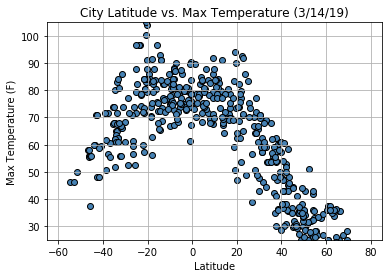

In [67]:
plt.title("City Latitude vs. Max Temperature (3/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(citiesWeather_df['Lat'], citiesWeather_df['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=1)
plt.ylim(25, 105)
plt.xlim(-65, 85)
plt.show()

#### Latitude vs. Humidity Plot

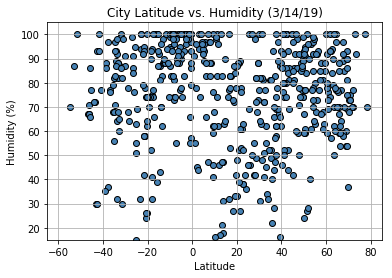

In [68]:
plt.title("City Latitude vs. Humidity (3/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(citiesWeather_df['Lat'], citiesWeather_df['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=1)
plt.ylim(15, 105)
plt.xlim(-65, 85)
plt.show()

#### Latitude vs. Cloudiness Plot

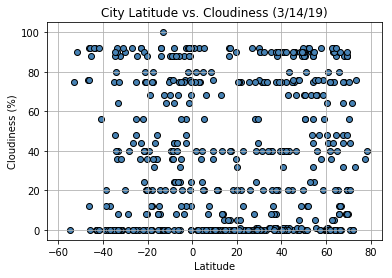

In [69]:
plt.title("City Latitude vs. Cloudiness (3/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(citiesWeather_df['Lat'], citiesWeather_df['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=1)
plt.ylim(-5, 105)
plt.xlim(-65, 85)
plt.show()

#### Latitude vs. Wind Speed Plot

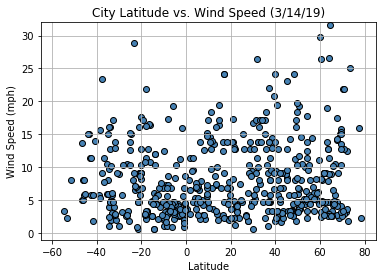

In [70]:
plt.title("City Latitude vs. Wind Speed (3/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(citiesWeather_df['Lat'], citiesWeather_df['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=1)
plt.ylim(-1, 32)
plt.xlim(-65, 85)
plt.show()